In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
# %matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

color_list = sns.color_palette()

### CIFAR10

In [2]:

numval = 5
numseed = 6
# ind 0: latent dim, ind 1: seed
psnr_dae = [[16.44, 17.41, 18.53, 18.94, 19.62],
            [16.4, 17.42, 18.45, 19.17, 19.71],
            [16.41, 17.46, 18.53, 19.17, 19.58],
            [16.38, 17.39, 18.48, 19.06, 19.66],
            [16.42, 17.4, 18.51, 18.98, 19.49],
            [16.4, 17.4, 18.48, 19.07, 19.6]]

psnr_jae = [[16.77, 17.93, 19.47, 20.18, 20.32],
            [16.79, 18.04, 19.35, 20.15, 20.61],
            [16.72, 17.99, 19.44, 20.22, 20.51],
            [16.74, 17.96, 19.34, 20.01, 20.27],
            [16.77, 17.98, 19.45, 20.16, 20.36],
            [16.81, 18.03, 19.42, 20.26, 20.68]]
psnr_ndpca = [[16.32, 17.71, 19.26, 20.18, 20.22],
              [16.26, 17.61, 19.19, 20.07, 20.15],
              [16.32, 17.72, 19.34, 20.17, 20.2], 
              [16.33, 17.72, 19.35, 20.34, 20.45],
              [16.33, 17.73, 19.36, 20.17, 20.21],
              [16.32, 17.71, 19.19, 20.2, 20.43]]
psnr_sep_enc_dec = [[15.92, 16.9, 17.93, 18.71, 19.2],
              [15.93, 16.9, 17.97, 18.62, 19.24],
              [15.75, 16.86, 17.9, 18.69, 19.24], 
              [15.92, 16.85, 17.93, 18.64, 19.28],
              [15.82, 16.9, 17.92, 18.78, 19.24],
              [15.9, 16.82, 17.95, 18.71, 19.28]]
Z = [8, 16, 32, 48, 64]
Z1 = [[8, 16, 31, 42, 54],
      [8, 16, 31, 41, 52],
      [8, 16, 30, 39, 48],
      [8, 16, 31, 41, 53],
      [8, 16, 31, 41, 53],
      [8, 16, 31, 41, 53]]

# convert to numpy array and transpose
psnr_dae = np.array(psnr_dae).T
psnr_jae = np.array(psnr_jae).T
psnr_ndpca = np.array(psnr_ndpca).T
psnr_sep_enc_dec = np.array(psnr_sep_enc_dec).T

Z = np.array(Z).T
Z1 = np.array(Z1).T

Z2 = np.zeros((numval, numseed))
### calculate Z2 = Z - Z1
for i in range(numval):
	for j in range(numseed):
		# Z1[i, j] = int(Z[i] / 2)
		Z2[i, j] = Z[i] - Z1[i, j]
		# print(Z[i], Z1[i, j], Z2[i, j])

Z1 = [[8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64]]    

Z1 = np.array(Z1).T

In [3]:
cifar_df = pd.DataFrame()
### add columns
for i in range(len(psnr_dae)): ### latent dim
    for j in range(len(psnr_dae[0])): ### seed
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_ndpca[i, j], 'method': 'NDPCA (ours)', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_dae[i, j], 'method': 'DAE', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_jae[i, j], 'method': 'JAE', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_sep_enc_dec[i, j], 'method': 'SepEncDec', 'seed': j}, ignore_index=True)

print(cifar_df.head())

   dpca_dim  Z1   Z2   psnr        method  seed
0         8   8  0.0  16.32  NDPCA (ours)     0
1         8   8  0.0  16.44           DAE     0
2         8   8  0.0  16.77           JAE     0
3         8   8  0.0  15.92     SepEncDec     0
4         8   8  0.0  16.26  NDPCA (ours)     1


### PnP

In [4]:
pnp_df = pd.read_csv('lift.csv')
pnp_df.drop(columns=['dim of z1 share'], inplace=True)
pnp_df.rename(columns={"dim of z1 private": "Z1", "dim of z2 private": "Z2"}, inplace=True)
pnp_df = pnp_df[pnp_df['method'] != 'No NDPCA']
pnp_df.sort_values(by=['dpca_dim', 'Z1', 'Z2', 'method', 'seed'], inplace=True)


# JAE_map = [[0.68, 0.0, 0.0, 0.0]
#           ,[0.64, 0.0, 0.0, 0.0]
#           ,[0.0, 0.0, 0.0, 0.0]
# ]

DAE_map = [[0.60, 0.67, 0.80, 0.0]
          ,[0.50, 0.67, 0.70, 0.0]
          ,[0.28, 0.83, 0.69, 0.0]
]

# Sep_map = [[0, 0, 0, X]
# 		  ,[0, 0, 0, X]
# ]

AE_Zs = [4, 8, 12, 24]

for z_ind, z in enumerate(AE_Zs):
	for seed in range(len(DAE_map)):
		pnp_df = pnp_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'success rate': DAE_map[seed][z_ind], 'method': 'DAE', 'seed': seed}, ignore_index=True)
# 		pnp_df = pnp_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'success rate': JAE_map[seed][z_ind], 'method': 'JAE', 'seed': seed}, ignore_index=True)


for z in np.arange(4, 49, 4): ### latent dim
	pnp_df = pnp_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'success rate': 0.83, 'method': 'Uncompressed', 'seed': 0}, ignore_index=True)

pnp_df.head()
pnp_df.tail()

,dpca_dim,success rate,Z1,Z2,seed,method
79,32,0.83,32,0,0,Uncompressed
80,36,0.83,36,0,0,Uncompressed
81,40,0.83,40,0,0,Uncompressed
82,44,0.83,44,0,0,Uncompressed
83,48,0.83,48,0,0,Uncompressed


### Airbus

In [5]:
airbus_df = pd.read_csv('./airbus.csv') # seed 0 ep 349
airbus_df.drop(columns=['dim of z2 private'], inplace=True)
airbus_df.rename(columns={"dim of z1 private": "Z1", "dim of z1 share": "Z2"}, inplace=True)
airbus_df = airbus_df[airbus_df['method'] != 'No NDPCA']

JAE_map = [[0.2781, 0.6603, 0.7343, 0.8007]
          ,[0.2905, 0.5993, 0.6646, 0.7595]
]
DAE_map = [[0.2087, 0.5329, 0.6188, 0.6531]
          ,[0.1453, 0.5617, 0.5843, 0.6338]
]

# Sep_map = [[0, 0, 0, X]
# 		  ,[0, 0, 0, X]
# ]

### ablation study
# NoPCA_map = [[] X
	     		# X
# ]

AE_Zs = [4, 12, 20, 40]

for z_ind, z in enumerate(AE_Zs):
	for seed in range(len(JAE_map)):
		airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': DAE_map[seed][z_ind], 'method': 'DAE', 'seed': seed}, ignore_index=True)
		airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': JAE_map[seed][z_ind], 'method': 'JAE', 'seed': seed}, ignore_index=True)


for z in np.arange(4, 41, 4): ### latent dim
	airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': 0, 'method': 'Task-agnostic NDPCA', 'seed': 0}, ignore_index=True)
	airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': 0, 'method': 'Task-agnostic NDPCA', 'seed': 1}, ignore_index=True)
	airbus_df = airbus_df.append({'dpca_dim': z, 'Z1': z, 'Z2': 0 ,'testmAP': 0.83, 'method': 'Uncompressed', 'seed': 0}, ignore_index=True)

airbus_df.head()

,dpca_dim,Z1,Z2,testmAP,seed,method
0,4,4,0,0.220770,0,NDPCA (ours)
1,8,6,2,0.439348,0,NDPCA (ours)
2,12,9,3,0.617028,0,NDPCA (ours)
3,16,12,4,0.729553,0,NDPCA (ours)
4,20,14,6,0.750393,0,NDPCA (ours)


### Plots

/tmp/ipykernel_1916592/1851034204.py:49: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax5 = sns.lineplot(data=pnp_df, x="dpca_dim", y="success rate", ax=ax_list["pnp_dpca"], linewidth=3, hue='method', style="method",
/tmp/ipykernel_1916592/1851034204.py:49: UserWarning: 
The dashes list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax5 = sns.lineplot(data=pnp_df, x="dpca_dim", y="success rate", ax=ax_list["pnp_dpca"], linewidth=3, hue='method', style="method",


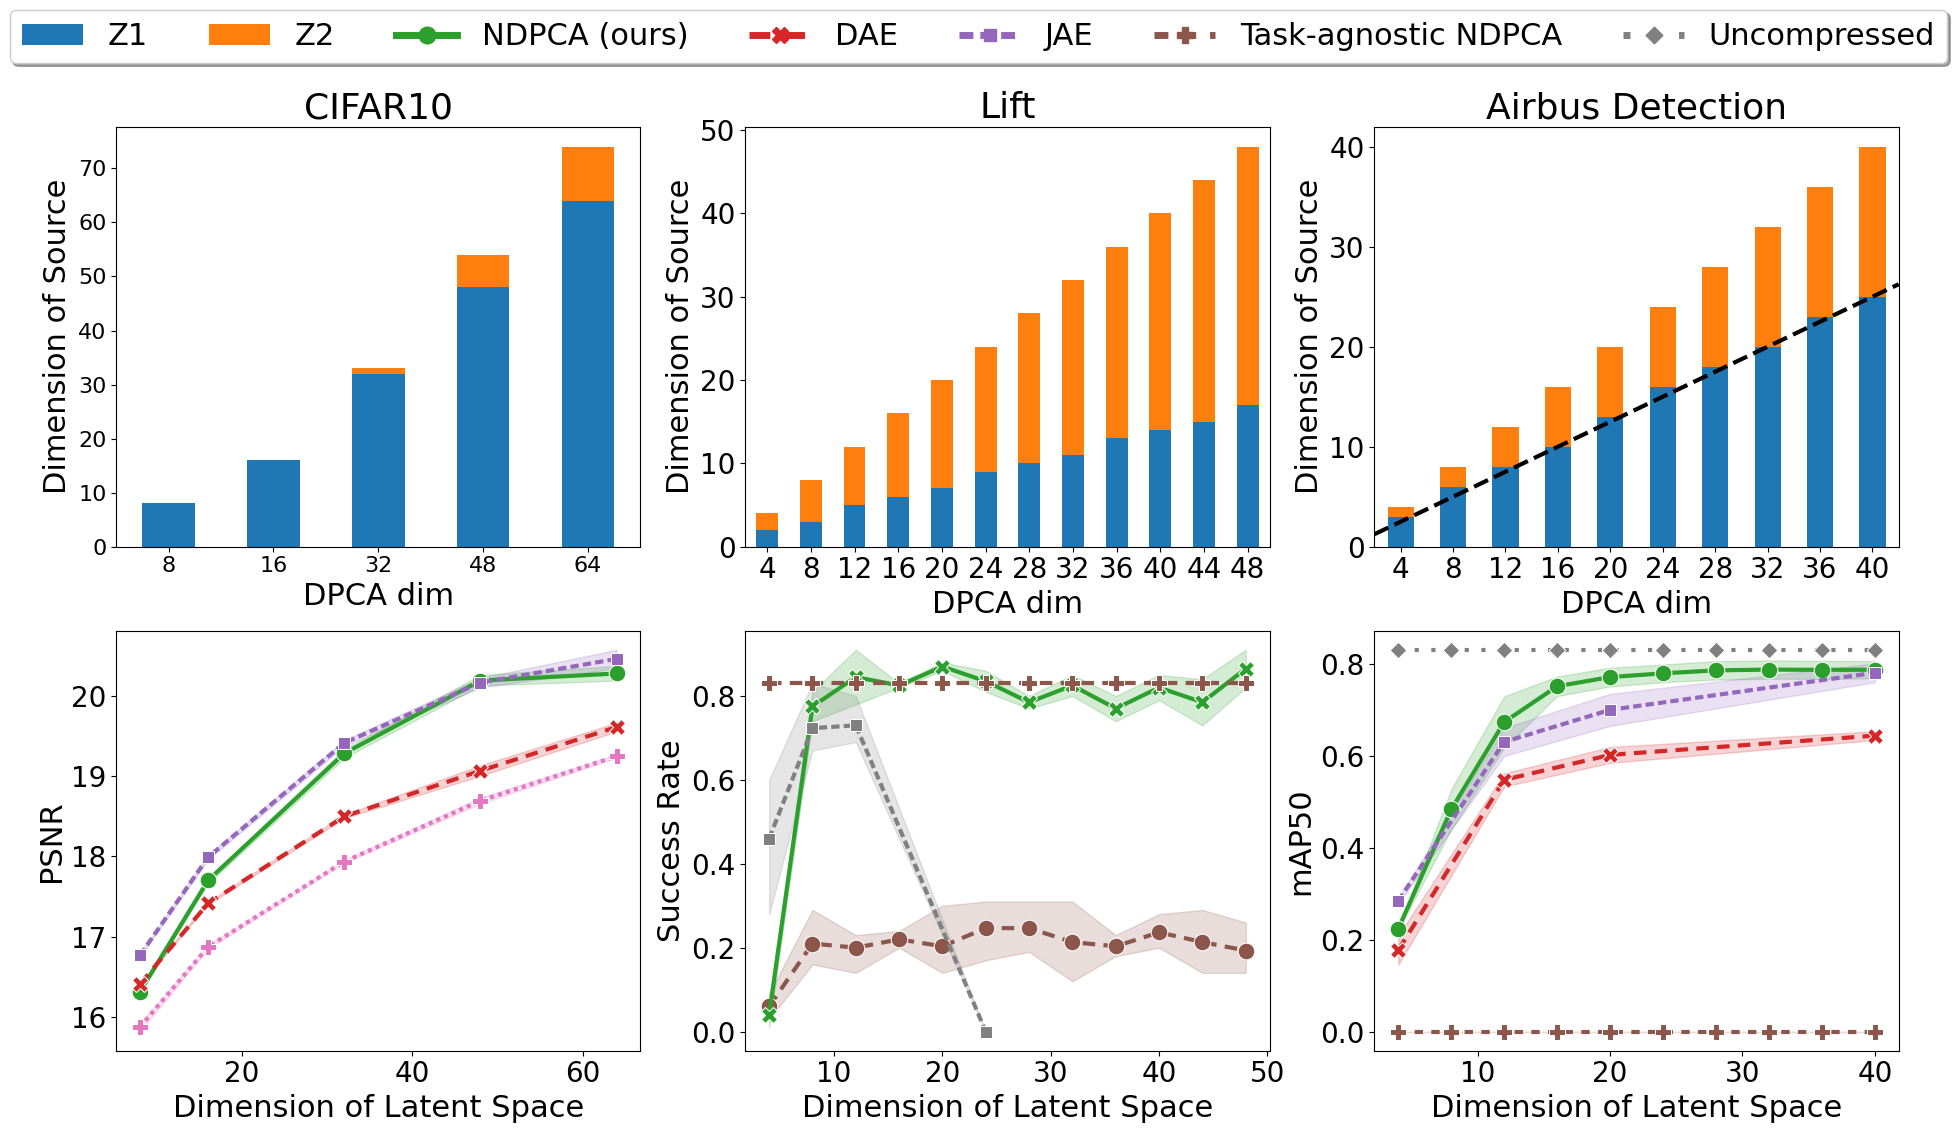

In [6]:
fig, ax_list = plt.subplot_mosaic(
        [["cifar_z", "pnp_z", "airbus_z"], 
        ["cifar_dpca", "pnp_dpca", "airbus_dpca"]],
        figsize=(23, 12))
        # gridspec_kw={
            # set the height ratios between the rows
            # "height_ratios": [1.5, 1.5, 1.5, 2, 2, 2],
            # set the width ratios between the columns
            # "width_ratios": [1, 1, 1, 1],})

xylabelsize = 22
titlesize = 26
legendsize = 22
ticksize = 20

####### ax #######
# 1 2 3
# 4 5 6
####### ax #######

### set title
ax_list["cifar_z"].set_title("CIFAR10", fontsize=titlesize)
ax_list["pnp_z"].set_title("Lift", fontsize=titlesize)
ax_list["airbus_z"].set_title("Airbus Detection", fontsize=titlesize)


### plot cifar denoising
## plot DPCA curve
ax4 = sns.lineplot(data=cifar_df, x="dpca_dim", y="psnr", ax=ax_list["cifar_dpca"], linewidth=3, hue='method', style="method",
                    palette=[color_list[2], color_list[3], color_list[4], color_list[6]], dashes=['', (3,2), (2,1), (1,1)], markers=True, markersize=12)
ax_list["cifar_dpca"].set_xlabel("Dimension of Latent Space", fontsize=xylabelsize)
ax_list["cifar_dpca"].set_ylabel("PSNR", fontsize=xylabelsize)
ax_list["cifar_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["cifar_dpca"].tick_params(axis="y", labelsize=ticksize)
ax_list["cifar_dpca"].legend().remove()
## plot Z1 and Z2
cifar_df_z = cifar_df.loc[(cifar_df["method"]).str.contains('NDPCA') & (cifar_df["seed"] == cifar_df.iloc[0]["seed"]) ]
cifar_df_z.plot(kind='bar', stacked=True, color=[color_list[0], color_list[1]], ax=ax_list["cifar_z"], 
                x="dpca_dim", y=["Z1", "Z2"], width=0.5, rot=0)
ax_list["cifar_z"].set_xlabel("DPCA dim", fontsize=xylabelsize)
ax_list["cifar_z"].set_ylabel("Dimension of Source", fontsize=xylabelsize)
ax_list["cifar_z"].tick_params(axis="x", labelsize=16)
ax_list["cifar_z"].tick_params(axis="y", labelsize=16)
ax_list["cifar_z"].legend().remove()


### Plot PNP
## plot DPCA curve
ax5 = sns.lineplot(data=pnp_df, x="dpca_dim", y="success rate", ax=ax_list["pnp_dpca"], linewidth=3, hue='method', style="method",
                    palette=[color_list[5], color_list[2], 'gray'], dashes=[(3,2), '', (2,1)], markers=True, markersize=12)
ax_list["pnp_dpca"].set_xlabel("Dimension of Latent Space", fontsize=xylabelsize)
ax_list["pnp_dpca"].set_ylabel("Success Rate", fontsize=xylabelsize)
ax_list["pnp_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["pnp_dpca"].tick_params(axis="y", labelsize=ticksize)
leg = ax_list["pnp_dpca"].legend()
ax_list["pnp_dpca"].legend().remove()
## plot Z1 and Z2
pnp_df_z = pnp_df.loc[(pnp_df["method"]).str.contains('ours') & (pnp_df["seed"] == 1) ]
pnp_df_z.plot(kind='bar', stacked=True, color=[color_list[0], color_list[1]], ax=ax_list["pnp_z"],
                x="dpca_dim", y=["Z1", "Z2"], width=0.5, rot=0)
ax_list["pnp_z"].set_xlabel("DPCA dim", fontsize=xylabelsize)
ax_list["pnp_z"].set_ylabel("Dimension of Source", fontsize=xylabelsize)
ax_list["pnp_z"].tick_params(axis="x", labelsize=ticksize)
ax_list["pnp_z"].tick_params(axis="y", labelsize=ticksize)
ax_list["pnp_z"].legend().remove()


### Plot AirBus Detection
## plot DPCA curve
ax6 = sns.lineplot(data=airbus_df, x="dpca_dim", y="testmAP", ax=ax_list["airbus_dpca"], linewidth=3, hue='method', style="method",
                    palette=[color_list[2], color_list[3], color_list[4], color_list[5], 'gray'], dashes=['', (3,2), (2,1), (2,2), (1,3)], markers=True, markersize=12)
ax_list["airbus_dpca"].set_xlabel("Dimension of Latent Space", fontsize=xylabelsize)
ax_list["airbus_dpca"].set_ylabel("mAP50", fontsize=xylabelsize)
ax_list["airbus_dpca"].tick_params(axis="x", labelsize=ticksize)
ax_list["airbus_dpca"].tick_params(axis="y", labelsize=ticksize)
leg = ax_list["airbus_dpca"].legend()
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax_list["airbus_dpca"].legend().remove()
## plot Z1 and Z2
airbus_df_z = airbus_df.loc[(airbus_df["method"]).str.contains('ours') & (airbus_df["seed"] == 1) ]
airbus_df_z.plot(kind='bar', stacked=True, color=[color_list[0], color_list[1]], ax=ax_list["airbus_z"],
                x="dpca_dim", y=["Z1", "Z2"], width=0.5, rot=0)
ax_list["airbus_z"].plot([-0.5, 9.5], [1.25, 26.25], color='black', linestyle='dashed', linewidth=3)
ax_list["airbus_z"].set_xlabel("DPCA dim", fontsize=xylabelsize)
ax_list["airbus_z"].set_ylabel("Dimension of Source", fontsize=xylabelsize)
ax_list["airbus_z"].tick_params(axis="x", labelsize=ticksize)
ax_list["airbus_z"].tick_params(axis="y", labelsize=ticksize)
ax_list["airbus_z"].legend().remove()


### Generate a legend for the first line only
# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes ] # [ax_list["cifar_dpca"], ax_list["cifar_z"]]]
lines_labels = [ax.get_legend_handles_labels() for ax in [ax_list["airbus_z"], ax_list["airbus_dpca"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

lgd = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.99), fancybox=True, shadow=True, ncol=7, fontsize=22, markerscale=2)
for line in lgd.get_lines():
    line.set_linewidth(5.0)
plt.show()
fig.savefig('./results.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')